In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
print(f"Shape of X_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of x_test  {x_test.shape}")
print(f"Shape of y_test  {y_test.shape}")


Shape of X_train (60000, 28, 28)
Shape of y_train (60000,)
Shape of x_test  (10000, 28, 28)
Shape of y_test  (10000,)


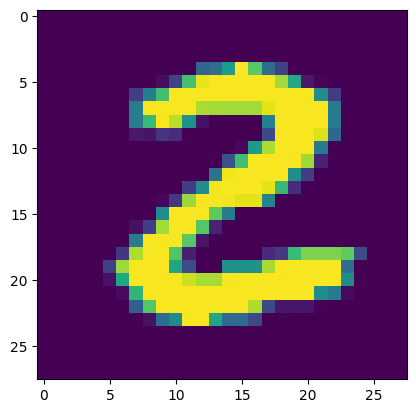

2


In [4]:
plt.imshow(x_train[25])
plt.show()
print(y_train[25])


In [5]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [6]:
x_train = x_train/255
x_test = x_test/255


In [7]:
print(x_train.shape, x_test.shape)


(60000, 28, 28) (10000, 28, 28)


In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu',name='L1'),
    keras.layers.Dense(50,activation='relu',name='L2'),
    keras.layers.Dense(10,activation='softmax',name='L3')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer="sgd",loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [11]:
history = model.fit(x_train, y_train,
              batch_size=30,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)


Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6811 - loss: 1.1321 - val_accuracy: 0.9025 - val_loss: 0.3319
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9067 - loss: 0.3238 - val_accuracy: 0.9261 - val_loss: 0.2657
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9243 - loss: 0.2612 - val_accuracy: 0.9356 - val_loss: 0.2261
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9332 - loss: 0.2299 - val_accuracy: 0.9405 - val_loss: 0.2068
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9391 - loss: 0.2055 - val_accuracy: 0.9455 - val_loss: 0.1875
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9462 - loss: 0.1840 - val_accuracy: 0.9489 - val_loss: 0.1747
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9515 - loss: 0.1654 - val_accuracy: 0.9530 - val_loss: 0.1638
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9554 - loss: 0.1529 -

<Axes: >

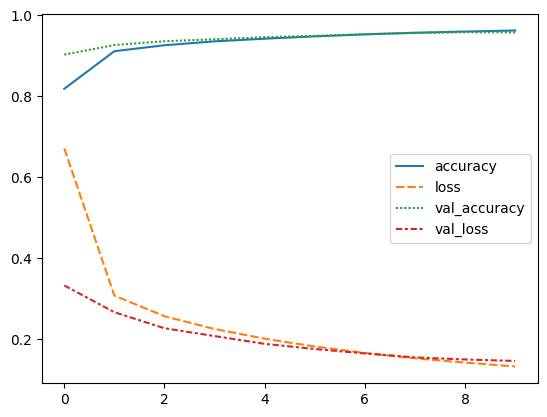

In [12]:
import seaborn as sns
sns.lineplot(model.history.history)


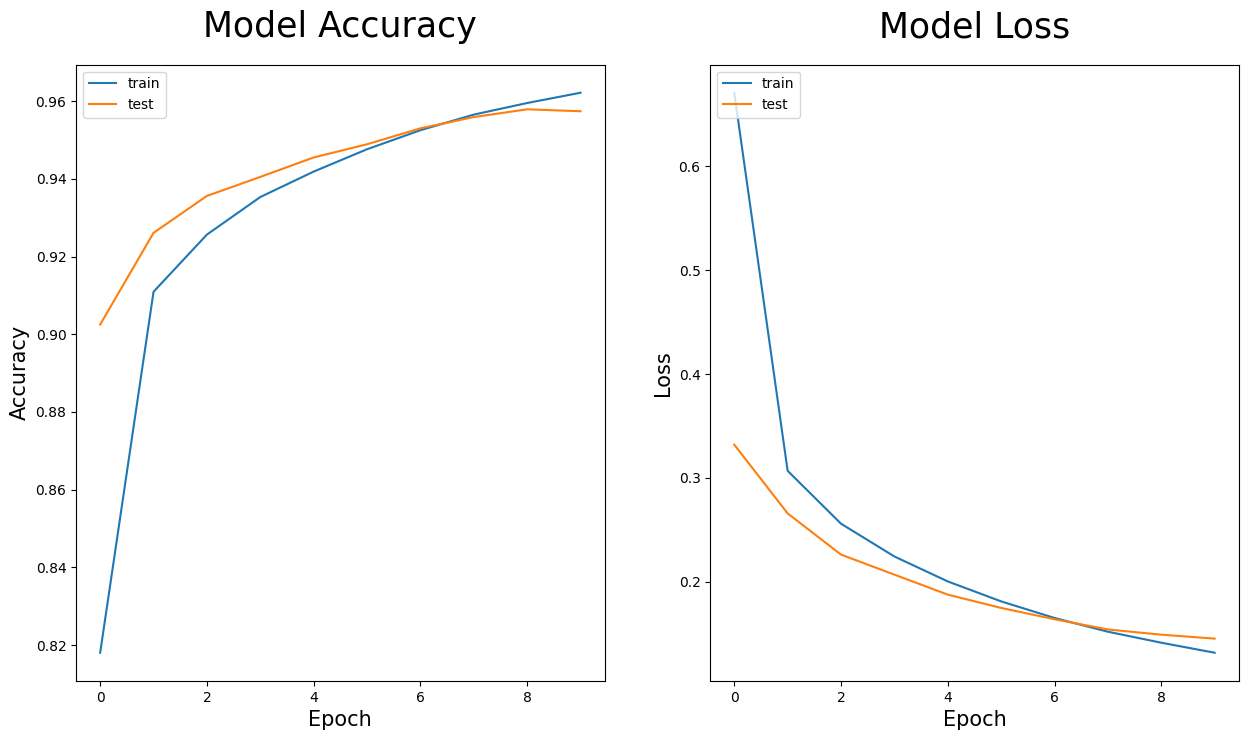

In [13]:
plt.figure(figsize=[15,8])
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [14]:
loss,accuracy = model.evaluate(x_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9537 - loss: 0.1616


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


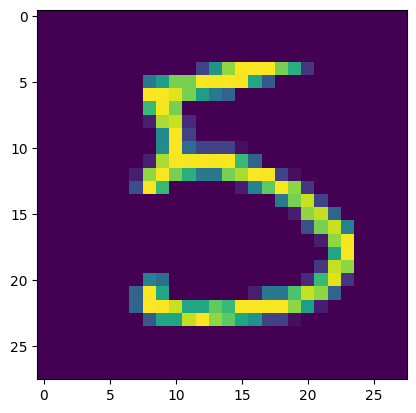

5


In [15]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[15])
plt.show()
print(np.argmax(predicted_value[15], axis=0))
